In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Tải tệp dữ liệu từ đường dẫn
data = pd.read_excel("average_data.xlsx")
data_real= pd.read_excel("/content/Precipitation.xlsx")
# Kiểm tra tên cột và xem dữ liệu
print(data.columns)  # Kiểm tra tên cột
print(data_real.columns)  # Kiểm tra tên cột



In [ ]:

data_real.rename(columns={'Unnamed: 0': 'Date','Precipitation':'actual Precipitation'}, inplace=True)

data_real.head(10000)


In [ ]:
data_gcm_copy = data.copy()
data_gcm_copy

Bước kế tiếp,Để việc quan sát dữ liệu rõ ràng thì mình sẽ đổi tên cột unnamed thành cột Date.Và để đảm bảo được không thay đổi dữ liệu ban đầu thì mình sẽ dùng code coppy ra một bản mới

In [ ]:
data_real_copy = data_real.copy()
data_real_copy

In [ ]:
# Hiển thị dữ liệu
print(data_gcm_copy.head(10))


In [ ]:
print(data_real_copy.head(100))

# **BƯỚC 2: TIỀN XỬ LÍ DỮ LIỆU**

In [ ]:
# Kiểm tra tên cột và xem dữ liệu
print(data_gcm_copy.columns)  # Kiểm tra tên cột
print(data_gcm_copy.head())  # Xem dữ liệu



In [ ]:
# Kiểm tra tên cột và xem dữ liệu
print(data_real_copy.columns)  # Kiểm tra tên cột
print(data_real_copy.head())  # Xem dữ liệu

In [ ]:
data_gcm_copy.describe()

In [ ]:
data_real_copy.describe()

In [ ]:
data_gcm_copy.shape


In [ ]:
data_real_copy.shape

In [ ]:
data_gcm_copy.info

In [ ]:
data_real_copy.info

In [ ]:
data_gcm_copy.isnull().sum()

In [ ]:
data_real_copy.isnull().sum()

In [ ]:
data_real_copy['Date'] = pd.to_datetime(data_real_copy['Date'])
data_gcm_copy['Date'] = pd.to_datetime(data_gcm_copy['Date'])

In [ ]:
# Merge GCM data into the new DataFrame based on date
merged_data = pd.merge(data_real_copy, data_gcm_copy, on='Date', how='left')
merged_data

In [ ]:
merged_data['bias'] = merged_data['actual Precipitation'] - merged_data['pr']

In [ ]:
merged_data

In [ ]:
merged_data = merged_data.set_index('Date')
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

merged_data = create_features(merged_data)

In [ ]:
merged_data

In [ ]:
# Average precipitation by month and year
sumAcPrMonth = merged_data.groupby(['month', 'year'])['actual Precipitation'].mean().reset_index()
# Average hurs by month and year
avgGCMHursMonth = merged_data.groupby(['month', 'year'])['hurs'].mean().reset_index()
# Average huss by month and year
avgGCMHussMonth = merged_data.groupby(['month', 'year'])['huss'].mean().reset_index()
# Average GCM precipitation by month and year
sumGCMPrMonth = merged_data.groupby(['month', 'year'])['pr'].mean().reset_index()
# Average ps by month and year
avgGCMPsMonth = merged_data.groupby(['month', 'year'])['ps'].mean().reset_index()
# Average Prsn by month and year
avgPrsnMonth = merged_data.groupby(['month', 'year'])['prsn'].mean().reset_index()
# Average rlds by month and year
avgGCMRldsMonth = merged_data.groupby(['month', 'year'])['rlds'].mean().reset_index()
# Average rsds by month and year
avgGCMRsdsMonth = merged_data.groupby(['month', 'year'])['rsds'].mean().reset_index()
# Average sfcwind by month and year
avgGCMSfcwindMonth = merged_data.groupby(['month', 'year'])['sfcwind'].mean().reset_index()
# Average tas by month and year
avgGCMtasMonth = merged_data.groupby(['month', 'year'])['tas'].mean().reset_index()
# Average tasmax by month and year
avgGCMtasmaxMonth = merged_data.groupby(['month', 'year'])['tasmax'].mean().reset_index()
# Average tasmin by month and year
avgGCMtasminMonth = merged_data.groupby(['month', 'year'])['tasmin'].mean().reset_index()

In [ ]:
avgGCMtasminMonth

In [ ]:
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumAcPrMonth.index = sumAcPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHursMonth.index = avgGCMHursMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHussMonth.index = avgGCMHussMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumGCMPrMonth.index = sumGCMPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRldsMonth.index = avgGCMRldsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMPsMonth.index = avgGCMPsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRsdsMonth.index = avgGCMRsdsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMSfcwindMonth.index = avgGCMSfcwindMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasMonth.index = avgGCMtasMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasmaxMonth.index = avgGCMtasmaxMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasminMonth.index = avgGCMtasminMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)

In [ ]:
sumAcPrMonth

In [ ]:
sumAcPrMonth.index = pd.to_datetime(sumAcPrMonth.index, format='%Y-%m-%d')
avgGCMHursMonth.index = pd.to_datetime(avgGCMHursMonth.index, format='%Y-%m-%d')
avgGCMHussMonth.index = pd.to_datetime(avgGCMHussMonth.index, format='%Y-%m-%d')
sumGCMPrMonth.index = pd.to_datetime(sumGCMPrMonth.index, format='%Y-%m-%d')
avgGCMRldsMonth.index = pd.to_datetime(avgGCMRldsMonth.index, format='%Y-%m-%d')
avgGCMPsMonth.index = pd.to_datetime(avgGCMPsMonth.index, format='%Y-%m-%d')
avgGCMRsdsMonth.index = pd.to_datetime(avgGCMRsdsMonth.index, format='%Y-%m-%d')
avgGCMSfcwindMonth.index = pd.to_datetime(avgGCMSfcwindMonth.index, format='%Y-%m-%d')
avgGCMtasMonth.index = pd.to_datetime(avgGCMtasMonth.index, format='%Y-%m-%d')
avgGCMtasmaxMonth.index = pd.to_datetime(avgGCMtasmaxMonth.index, format='%Y-%m-%d')
avgGCMtasminMonth.index = pd.to_datetime(avgGCMtasminMonth.index, format='%Y-%m-%d')

In [ ]:
# Tạo chuỗi thời gian từ tháng 1/1980 đến tháng 12/2014
dates = pd.date_range(start="1980-01-01", end="2014-12-01", freq='MS')

In [ ]:
df = pd.DataFrame(index=dates)
df['actual Precipitation'] = sumAcPrMonth.drop(['month','year'], axis = 1)
df['hurs'] = avgGCMHursMonth.drop(['month','year'], axis = 1)
df['huss'] = avgGCMHussMonth.drop(['month','year'], axis = 1)
df['pr'] = sumGCMPrMonth.drop(['month','year'], axis = 1)
df['ps'] = avgGCMPsMonth.drop(['month','year'], axis = 1)
df['rlds'] =avgGCMRldsMonth.drop(['month','year'], axis = 1)
df['rsds'] =avgGCMRsdsMonth.drop(['month','year'], axis = 1)
df['sfcwind'] =avgGCMSfcwindMonth.drop(['month','year'], axis = 1)
df['tas'] =avgGCMtasMonth.drop(['month','year'], axis = 1)
df['tasmax'] =avgGCMtasmaxMonth.drop(['month','year'], axis = 1)
df['tasmin'] =avgGCMtasminMonth.drop(['month','year'], axis = 1)

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
# bar chart
plt.figure(figsize=(17, 6))
plt.plot(df.index, df['actual Precipitation'], color='red', label='actual Precipitation')
plt.plot(df.index, df['pr'], color='blue')
# Đặt nhãn cho trục x và y
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa theo tháng (unit: mm/day)')
# Đặt tiêu đề cho biểu đồ
plt.title('Trung bình lượng mưa tháng theo các năm của GCM và thực đo')
# Hiển thị biểu đồ
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
plt.show()

CHIA TRAIN VÀ TEST

In [ ]:
start_date = dt.datetime(2010, 1, 1)
df.index = pd.to_datetime(df.index)
train_set = df[df.index < start_date]
test_set = df[df.index >= start_date]

In [ ]:
train_set

In [ ]:
test_set

In [ ]:
X_train = train_set.drop('actual Precipitation', axis = 1)
X_test = test_set.drop('actual Precipitation', axis = 1)
y_train = train_set['actual Precipitation']
y_test = test_set['actual Precipitation']

# **# Hàm đánh giá mô hình**

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
def NSE(y_test, y_pred):
  return 1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
nse_scorer = make_scorer(NSE)

In [ ]:
# Hàm RMSE custom
def RMSE(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)
rmse_scorer = make_scorer(RMSE)

In [ ]:
def  MAE(y_test, y_pred):
    return mean_absolute_error(y_test, y_pred)
mae_scorer = make_scorer(MAE)

# **THUẬT TOÁN XGBOOTS VỚI THAM SỐ MẶT ĐỊNH**

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split,KFold

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

In [ ]:
xgb_model.get_params()
xgb.plot_importance(xgb_model)

In [ ]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

In [ ]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

# **TINH CHỈNH MÔ HÌNH SỬ DỤNG GRIDSEARCH CV**

**sử dụng Grid Search SV**

In [ ]:
X = df.drop('actual Precipitation', axis = 1)
y = df['actual Precipitation']

In [ ]:
n_estimators = [50,100,150, 200]
max_depth = [1,3,5,7]
learning_rate = [0.001, 0.01, 0.1, 0.8, 1]
lambda_val = [ 0.001, 0.01, 0.1,0.5]
gamma = [0.01, 0.1,0.3, 0.5,1, 3, 5]

# Tạo scorer dựa trên RMSE
rmse_scorer = make_scorer(RMSE)

# KFold đảm bảo chia dữ liệu thành các fold.
kfold = KFold(n_splits=10, shuffle=True, random_state= 42)

**tỉnh chỉnh mô hình**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the XGBRegressor
model = xgb.XGBRegressor(objective='reg:tweedie')

# Create a parameter grid
param_grid_xgb = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'reg_lambda': lambda_val,
    'learning_rate': learning_rate,
    'gamma': gamma
}

#Đây là tạo một GridSearchCV object để tìm kiếm tập tham số tốt nhất cho mô hình.
#n_job=-1 : dùng CPU, cv=kfold: Sử dụng phương thức cross-validation cho k fold, verbose=1: In kết quả tối ưu hóa trong quá trình thực thi.
grid_search = GridSearchCV(xgb_model,
                           param_grid_xgb,
                           scoring = rmse_scorer,
                           cv=kfold,
                           verbose=1,
                           error_score='raise',
                          )
grid_result = grid_search.fit(X,y)

Fitting 10 folds for each of 2240 candidates, totalling 22400 fits


In [ ]:
# Xác định index của kết quả có RMSE nhỏ nhất
best_index = grid_result.cv_results_['mean_test_score'].argmin()

# Truy cập giá trị RMSE và bộ siêu tham số tương ứng
best_rmse = grid_result.cv_results_['mean_test_score'][best_index]
best_params = grid_result.cv_results_['params'][best_index]

# In ra giá trị RMSE nhỏ nhất và bộ siêu tham số tương ứng
print("Best RMSE:", best_rmse)
print("Best Parameters:", best_params)

Best RMSE: 2.532045697061835
Best Parameters: {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.5}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

4.430949 (0.311594) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.001}
4.430942 (0.311582) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.01}
4.431008 (0.311580) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.1}
4.431294 (0.311583) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.5}
4.299485 (0.313719) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 0.001}
4.299497 (0.313718) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 0.01}
4.299605 (0.313701) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 0.1}
4.300139 (0.313683) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 0.5}
4.176642 (0.315681) wi

# **Kiểm tra kết quả lại với tham số tốt nhất**

In [ ]:
# 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.5

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:tweedie', gamma= 0.01, learning_rate = 0.1, max_depth = 1, n_estimators = 50, reg_lambda = 0.5)#max_depth=2, n_estimators=50
xgb_model.fit(X_train,
              y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, objective='reg:tweedie', ...)

In [ ]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error Train:', mae)
print('Root mean squared Error Train:', rmse)
print("NSE Train:", nse)

Mean absolute Error Train: 1.7333701144723572
Root mean squared Error Train: 2.4400032829775142
NSE Train: 0.7183640867845671


In [ ]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 1.9350098381579488
Root mean squared Error: 2.5785803543017853
NSE: 0.6571103706576111


**Sử dụng crossvalidation để đánh giá hiệu suất**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [ ]:
# Đánh giá độ chính xác
mae = cross_val_score(xgb_model,X,y, cv=kfold, scoring=mae_scorer)
rmse = cross_val_score(xgb_model,X,y, cv=kfold, scoring=rmse_scorer)
nse = cross_val_score(xgb_model,X,y, cv=kfold, scoring=nse_scorer)
print(f'RMSE of each fold:')
print(rmse)
print(f'mean RMSE of Fold: {rmse.mean()}')
print(f'\nMAE of each fold:')
print(mae)
print(f'mean MAE of Fold: {mae.mean()}')
print(f'\nNSE of each fold:')
print(nse)
print(f'mean NSE of Fold: {nse.mean()}')

RMSE of each fold:
[2.15490682 2.63026186 2.75605757 2.91754027 2.34896805 1.91807129
 2.88369149 2.84096509 2.36935796 2.7156022 ]
mean RMSE of Fold: 2.553542257632416

MAE of each fold:
[1.61331749 2.04386177 2.05274092 2.03098857 1.70811806 1.52370702
 2.06702661 1.82468667 1.7551759  2.10407224]
mean MAE of Fold: 1.8723695244196983

NSE of each fold:
[0.72722134 0.66956859 0.67449786 0.68103289 0.71628829 0.78390932
 0.5921901  0.62682336 0.72307101 0.58977457]
mean NSE of Fold: 0.6784377340354133


**in ra thuộc tính quan trọng**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

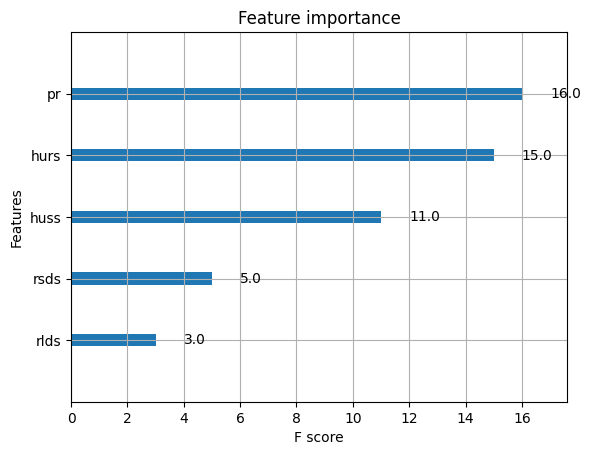

In [ ]:
xgb_model.get_params()
xgb.plot_importance(xgb_model)

**Vẽ lại biểu đồ xem xét**

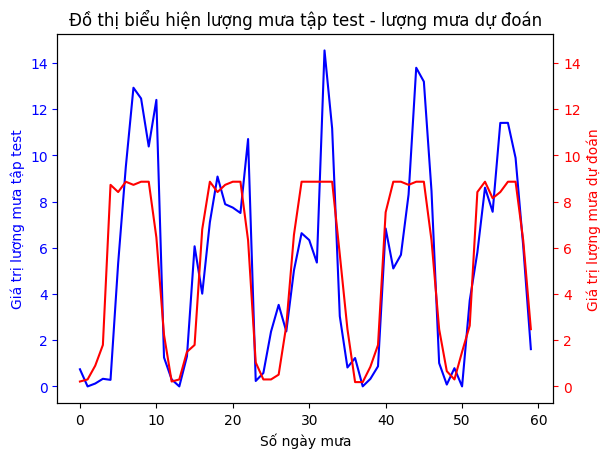

In [ ]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số ngày mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()


# **Thuật toán LIGHTGBM**

In [ ]:
import lightgbm as lgb

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split,KFold

In [ ]:

model_LightGBM = lgb.LGBMRegressor()
model_LightGBM.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 5.217192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

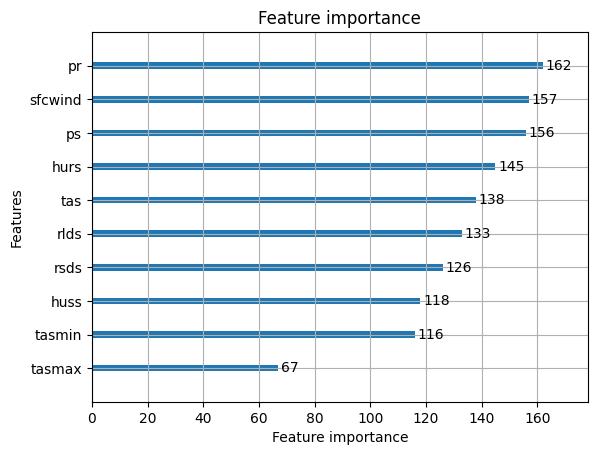

In [ ]:
model_LightGBM.get_params()
lgb.plot_importance(model_LightGBM)

In [ ]:
y_pred_train_lightgbm = model_LightGBM.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_lightgbm))
mae = mean_absolute_error(y_train, y_pred_train_lightgbm)
nse = NSE(y_train, y_pred_train_lightgbm)
print('Root mean squared error train: %f' %(rmse))
print('Mean Abosolute error train: %f' %(mae))
print('NSE train: %f' %(nse))

Root mean squared error train: 1.129095
Mean Abosolute error train: 0.796793
NSE train: 0.939693


In [ ]:
y_pred_test_lightgbm = model_LightGBM.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lightgbm))
mae = mean_absolute_error(y_test, y_pred_test_lightgbm)
nse = NSE(y_test, y_pred_test_lightgbm)
print('Root mean squared error test: %f' %(rmse))
print('Mean Abosolute error test: %f' %(mae))
print('NSE test: %f' %(nse))

Root mean squared error test: 3.007831
Mean Abosolute error test: 2.170824
NSE test: 0.533448


**SỬ DỤNG GRIDSEARCH CV**

In [ ]:
X = df.drop('actual Precipitation', axis = 1)
y = df['actual Precipitation']

In [ ]:
# Define the hyperparameters you want to search over
n_estimators = [50,90,100,150, 200]
max_depth = [2, 4, 6, 8,10]
learning_rate = [0.001, 0.01, 0.1, 0.5, 0.8, 1]
lambda_val = [ 0.001, 0.01, 0.1, 0.3, 0.5]
gamma = [0.01, 0.1, 0.2, 0.5, 1, 3, 5]

# Tạo scorer dựa trên RMSE
rmse_scorer = make_scorer(RMSE)

# KFold đảm bảo chia dữ liệu thành các fold.
kfold = KFold(n_splits=10, shuffle=True, random_state= 42)

# **TINH CHỈNH THAM SỐ**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': 'True',
    'boosting_type':'dart'
}
model_LightGBM = lgb.LGBMRegressor(**params)

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'reg_lambda': lambda_val,
    'learning_rate': learning_rate
}

In [ ]:
grid_search = GridSearchCV(
    estimator=model_LightGBM,
    param_grid=param_grid,
    cv=kfold,
    scoring=rmse_scorer,
    error_score='raise'
)
grid_result=grid_search.fit(X,y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Xác định index của kết quả có RMSE nhỏ nhất
best_index = grid_result.cv_results_['mean_test_score'].argmin()

# Truy cập giá trị RMSE và bộ siêu tham số tương ứng
best_rmse = grid_result.cv_results_['mean_test_score'][best_index]
best_params = grid_result.cv_results_['params'][best_index]

# In ra giá trị RMSE nhỏ nhất và bộ siêu tham số tương ứng
print("Best RMSE:", best_rmse)
print("Best Parameters:", best_params)

Best RMSE: 2.5982043674584783
Best Parameters: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.3}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

4.577563 (0.387897) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.001}
4.577567 (0.387897) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.01}
4.577609 (0.387892) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.1}
4.577690 (0.387896) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.3}
4.577815 (0.387910) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.5}
5.040784 (0.482985) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.001}
5.040787 (0.482984) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.01}
5.040806 (0.482990) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.1}
5.040840 (0.483008) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.3}
5.040901 (0.483018) with: {'learning_rat

In [ ]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': True,
    'boosting_type': 'dart',
    'n_estimators': 200,
    'max_depth': 2,
    'learning_rate': 0.1,
    'reg_lambda': 0.3
}

model_train_lightgbm = lgb.LGBMRegressor(**params)

# Fit the model with early stopping
model_train_lightgbm.fit(
    X_train,
    y_train
)

[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 1.651959


LGBMRegressor(boosting_type='dart', force_row_wise=True, max_depth=2,
              metric='mean_squared_error', n_estimators=200,
              objective='tweedie', reg_lambda=0.3)

In [ ]:
y_pred_train = model_train_lightgbm.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error Train:', mae)
print('Root mean squared Error Train:', rmse)
print("NSE Train:", nse)

Mean absolute Error Train: 1.6227427332722024
Root mean squared Error Train: 2.3636913107186652
NSE Train: 0.7357051323166619


In [ ]:
y_pred_test = model_train_lightgbm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 1.960235318780179
Root mean squared Error: 2.66543165521081
NSE: 0.633623074896984


In [ ]:
# Đánh giá độ chính xác
mae = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=mae_scorer)
rmse = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=rmse_scorer)
nse = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=nse_scorer)
print(f'RMSE of each fold:')
print(rmse)
print(f'mean RMSE of Fold: {rmse.mean()}')
print(f'\nMAE of each fold:')
print(mae)
print(f'mean MAE of Fold: {mae.mean()}')
print(f'\nNSE of each fold:')
print(nse)
print(f'mean NSE of Fold: {nse.mean()}')

[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.656058
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.623759
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.655677
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.650621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.649018
[LightGBM] [Info] Total Bins 1270
[

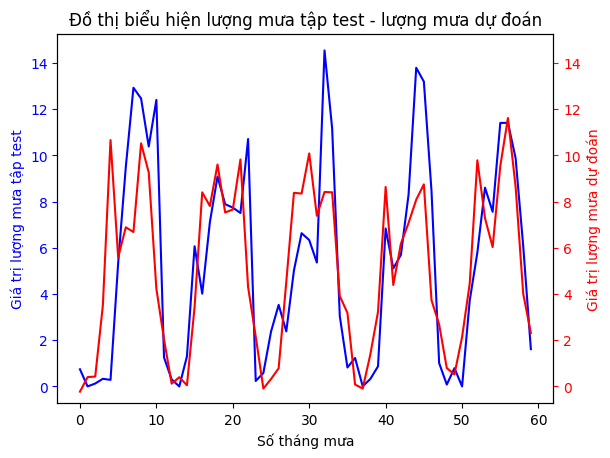

In [ ]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số tháng mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test_lightgbm

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

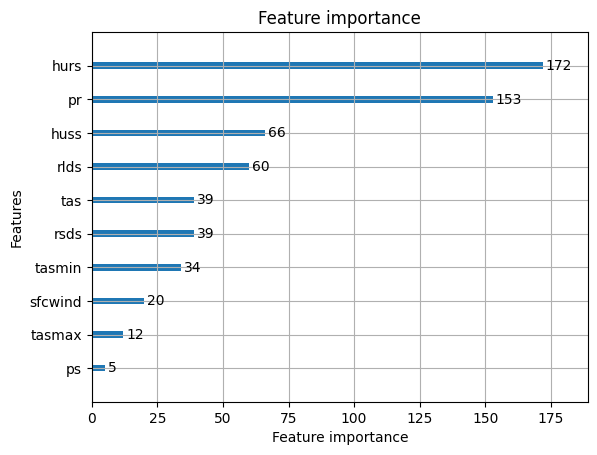

In [ ]:
model_train_lightgbm.get_params()
lgb.plot_importance(model_train_lightgbm)